<a href="https://colab.research.google.com/github/lydia98/QTM385_Bubbletea/blob/master/VisualizingNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graphs of multivariable functions

It is important to be able to visualize the graphs of common multivariable functions. Often functions have graphs that are difficult  to sketch by hand. In this lab we will explore simple methods for visualizing certain curves and surfaces using the programming language Python and additional Python packages such as MatPlotLib.

## MatPlotLib
Quoting Jake VanderPlas
> Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. Three-dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation.

In [0]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

The selection above is an excerpt from the Python Data Science Handbook by Jake VanderPlas. I will only expect you to be familiar with the material I present below, but if you want to read more on your own, here is the link https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html from which the quote is taken. 

### A blank canvas

To sketch only the three-dimensional axes, we start by calling the `axes()` function from the `matplotlib.pyplot` package which we imported using the alias `plt`, and we pass `projection='3d'` as the argument to this function. Using the alias `plt` is a convention among matplotlib users. It saves you from having to type `matplotlib.pyplot.figure()`  and  `matplotlib.pyplot.axes(projection='3d')` 

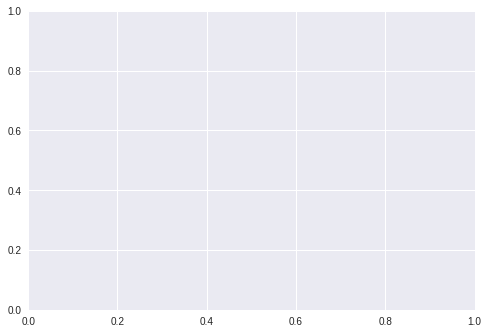

In [0]:
ax = plt.axes()

#### Exercise
Try removing the argument `projection='3d'` and run the code above again. What do you see?

### ReLU

Let's start by plotting the *Relu* function, short for *Rectified Linear Unit*. 

What is it? Mathematically, by definition, $\text{ReLU}(x):\mathbb{R}\rightarrow \mathbb{R}$ is the one-variable function
$$\text{ReLU}(x):=\text{maximum}(0,x)$$

Why is it called this? It is a convention in the machine learning community.

Note that it is not a linear function as the graph is not a line.

Instead, it is a *piecewise linear function*, that is, a function which is linear over 'pieces' of its domain.  See https://en.wikipedia.org/wiki/Piecewise_linear_function and https://www.ibm.com/support/knowledgecenter/SSSA5P_12.7.0/ilog.odms.cplex.help/CPLEX/UsrMan/topics/discr_optim/pwl/02_pwl_defn.html for more examples. 


We define it in the Python code below. In order to use the function `maximum(0,x)' we must import the NumPy package (http://www.numpy.org/).

In [0]:
import numpy as np

In [0]:
def ReLU(x):
    """ReLU returns x if x>0, else 0."""
    return np.maximum(0,x)

To sketch the graph, we pass in a list of values for x, and then `ax.plot` connects the pairs (x,ReLU(x)) of points with lines.

Text(0.5,1,'y=ReLU(x)')

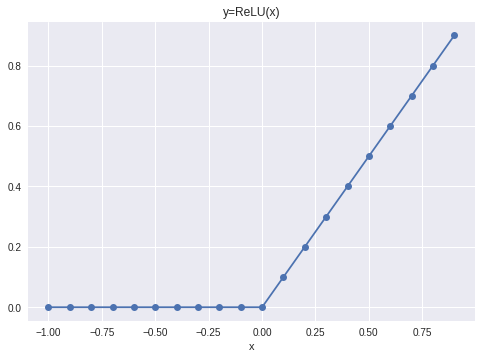

In [0]:
# values from -1 to 1, in intervals of 0.1
x = np.arange(-1, 1, 0.1)

# blank canvas, just coordinate axes
ax = plt.axes()

# plot y=relu(x) on canvas and mark pairs (x,relu(x)) with circle
ax.plot(x, ReLU(x), 'o-')

# label axes
ax.set_xlabel('x')
ax.set_title('y=ReLU(x)')

In [0]:
dd

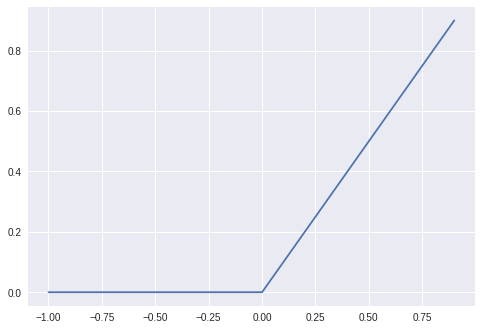

#### Exercise
The points are in the plot above are marked my dots. How small can the intervals (the .1) be before the distinct points blur? For instance, in the code above, change .1 to .05 and see what happens.

## Linear combinations of ReLU functions
In *deep learning*, linear combinations of $\text{ReLU}$ functions are used to construct simple functions which can well-approximate more complex functions. Consider the multivariable real-valued function $f: \mathbb{R}^2\rightarrow \mathbb{R}^1$ defined by
$$ f(x,y):=\text{ReLU}(x) + \text{ReLU}(y)$$

Let's define it in Python now.

In [0]:
def f(x, y):
    return ReLU(x) + ReLU(y)

Let's see what it's graph looks like.

Text(0.5,0,'y')

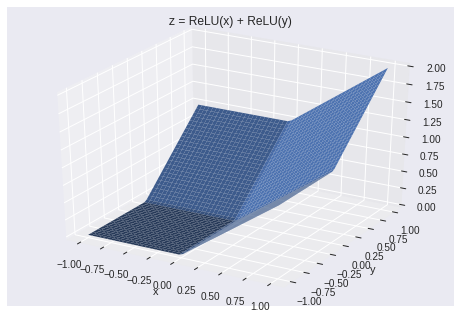

In [0]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('z = ReLU(x) + ReLU(y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.view_init(30,0)

#### Exercise
Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. Remove the comment hashtag # in the code above to see the effect it has. In the above example, we used an elevation of 30 degrees (that is, 30 degrees above the x-y plane) and an azimuth of 0 degrees (that is, rotated 0 degrees counter-clockwise about the z-axis. What elevation and azimuthal angle are the defaults?, that is, what do you need to put into `view_init` to recover the view you had when `view_init` was commented out?

Note, np is the alias for numpy we introduced earlier when we imported the package Numpy. There are some functions which are built in to Python and others which live in "packages" which must be imported. We will be using Numpy a lot as it has all the functions we need for working with vector based mathematics.

Note, the math equations in the label are not written in Python but another language called $Late\chi$, pronounced ''lay-tek" since the X is in fact the greek letter $\chi$. It is a language commonly used for typesetting mathematics and scientific literature. It originates in the language $Te\chi$ which was developed by the famous computer scientist Donald Knuth so that he could publish his own book in a satisfactory way! See https://en.wikipedia.org/wiki/TeX for details if you are interested.

In [0]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('z = $\sqrt{1-x^2-y^2}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.view_init(30,0)

### Contour plot (same function)
We will be discussing contours in Chapter 14. Here is a contour plot of the function g(x.y).

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');